<a href="https://colab.research.google.com/github/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/Chapter4_Using_Public_Dataset_with_Tensorflow_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4. Using Public Dataset with Tensorflow Datasets


![Tensorflow dataset](https://i.ytimg.com/vi/6th3rahsw9Y/maxresdefault.jpg)

Chào mọi người, tụi mình lại gặp nhau rồi. 😊

Ở chương 4 này sẽ khá nhẹ nhàng cho mọi người, đôi khi sẽ có phần nhàm chán. Mình sẽ cố gắng giải thích tóm gọn hết mức có thể để mọi người đi qua nhanh nhưng vẫn dễ hiểu nhất nha. 🛠️

Như mọi người thấy ở các chương trước, tụi mình đã lấy dữ liệu cho việc huấn luyện mô hình thông qua nhiều cách khác nhau, như bộ **Fashion MNIST** được đóng sẵn của Keras chỉ cần gọi hàm, hay bộ ảnh người, ngựa, chó và mèo đều được đóng lại dưới dạng một tệp ZIP để tải về và giải nén. 📂


Ví dụ điển hình như ở các chương trước, chúng ta đã lấy dữ liệu về Fashion Mnist từ Keras một cách dễ dàng với việc gọi thư viện hay module.


```python
import tensorflow

data = tensorflow.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images,test_labels) = data.load_data()

```




Có rất nhiều cách để thu thập dữ liệu đã được công bố, tuy nhiên một số lại yêu cầu ta phải hiểu rõ, học nhiều kỹ năng chuyên môn để có thể sử dụng chúng. Do đó, **TensorFlow Dataset** được ra đời để giải quyết vấn đề này.


## Nội dung chương 4: 🛠️  

Về phần nội dung chương, tụi mình sẽ tìm hiểu về **TensorFlow Dataset (TFDS)**. 📂  
Mục đích chính của nó là giúp mọi người có thể sử dụng dữ liệu một cách dễ dàng nhất, khi mà hầu như các bước chuẩn bị, tiền xử lý dữ liệu, cũng như việc đưa dữ liệu vào bên trong các API thân thiện của TensorFlow đều đã được thực hiện hết cho các bạn. ✨


**TFDS** ngày càng mở rộng đáng kể cả về số lượng dữ liệu có sẵn lẫn các hình thức và kiểu dữ liệu, cũng trở nên đa dạng hơn. 🌍

Một số kiểu dữ liệu tiêu biểu bao gồm:  

- Âm thanh (audio). 🎵  
- Hình ảnh (image). 🖼️  
- Phát hiện, xác định các đối tượng (object detection). 🔍  
- Dữ liệu có cấu trúc: thường ở dạng bảng. 📊  
- Dữ liệu văn bản tóm tắt: tin tức CNN, email hàng ngày, bài báo khoa học, WikiHow, ... ✍️  
- Dữ liệu văn bản thông thường: đánh giá IMDb, các câu hỏi ngôn ngữ tự nhiên, ... 📚  
- Dữ liệu văn bản đa dạng cho tác vụ phiên dịch: các bộ dữ liệu huấn luyện cho dịch thuật. 🌐  
- Dữ liệu dạng video: Moving MNIST, StarCraft. 🎥


# Lý thuyết đủ nhiều rồi, tụi mình bắt tay vào sử dụng **TFDS** luôn nha. 🚀✨


Tụi mình sẽ làm một vài ví dụ sử dụng **TFDS** để hiểu cách chúng ta có thể tương tác với dữ liệu, bất kể loại nào. 🛠️  

Trước tiên, cần cài đặt và nâng cấp **TensorFlow** cũng như **TFDS**. 🚀


In [1]:
# Đầu tiên mọi người cần tải TFDS về ha.
!pip install tensorflow-datasets

In [2]:
!pip install --upgrade tfds-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 46.3 MB/s eta 0:00:00


In [3]:
!pip show tensorflow-datasets

Name: tensorflow-datasets
Version: 4.9.7
Summary: tensorflow/datasets is a library of datasets ready to use with TensorFlow.
Home-page: https://github.com/tensorflow/datasets
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, array-record, click, dm-tree, etils, immutabledict, numpy, promise, protobuf, psutil, pyarrow, requests, simple-parsing, tensorflow-metadata, termcolor, toml, tqdm, wrapt
Required-by: 


In [4]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


Tụi mình có thể truy cập dữ liệu bằng cách cung cấp tên bộ dữ liệu cho phương thức **tfds.load()** nha.

Ở đây, mình sẽ lấy bộ **Fashion MNIST** làm ví dụ.


In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:

# Tải bộ dữ liệu về
mnist_data = tfds.load(name="fashion_mnist")

# Kiểu dữ liệu trả về là
print(type(mnist_data))

# Tiến hành kiểm tra các thành phần bên trong.
for item in mnist_data:
  print(item)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.VQRQXX_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.VQRQXX_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
<class 'dict'>
train
test


Như mọi người có thể thấy, bộ dữ liệu được trả về dưới dạng một dictionary, được chia thành 2 thành phần chính là **train** và **test**. 📂  

Nếu mọi người muốn trả về cụ thể một phần của dữ liệu, ví dụ như **train**, chúng ta có thể chỉ định cụ thể luôn bên trong hàm **tfds.load()** với tham số **split**. 🔧  


In [ ]:
mnist_train = tfds.load(name="fashion_mnist", split="train")

# Hàm assert để kiểm tra, đảm bảo một điều kiện gì đó, ở đây là kiểm tra mnist_train có đảm bảo thuộc tf.data.Dataset không.
assert isinstance(mnist_train, tf.data.Dataset)

print(f"Kiểu dữ liệu của mnist_train: {type(mnist_train)}")

Kiểu dữ liệu của mnist_train: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
type(mnist_train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

Như đã ghi ở trên, **mnist_train** có định dạng là một lớp được khởi tạo hoặc một **Dataset Adapter** (bộ điều hợp dữ liệu). 🛠️  

Ở đây, tụi mình có thể dùng một vòng lặp để quan sát dữ liệu bên trong nha. 👀  
Tụi mình có thể sử dụng phương thức **.take(1)** để lấy được đối tượng đầu tiên trong **adapter**. 🎯  

*P/s: Mình thấy từ **adapter** để nguyên sẽ chính xác nghĩa và hay hơn. Nếu mọi người có góp ý để cải thiện phần dịch này, có thể ib cho mình nhé.* ✍️


In [ ]:
for item in mnist_train.take(1):
  print(f"Kiểu dữ liệu của item {type(item)}")
  print(f"Các thành phần bên trong item {item.keys()}")

Kiểu dữ liệu của item <class 'dict'>
Các thành phần bên trong item dict_keys(['image', 'label'])


Như mọi người có thể thấy, với mỗi item bên trong tập dữ liệu **mnist_train**, chúng sẽ được lưu dưới dạng một đối tượng dictionary với 2 thành phần chính là **image** và **label**.

Mở rộng ra, chúng ta sẽ tìm hiểu kỹ hơn về 2 thành phần bên trong này.


Nhãn của mẫu đầu tiên: 2
Kích thước hình ảnh: (28, 28, 1)


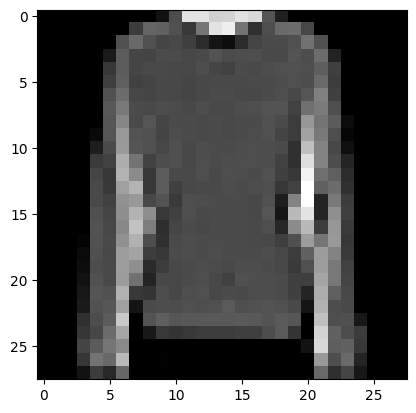

In [ ]:
import matplotlib.pyplot as plt

for item in mnist_train.take(1):
  print(f"Nhãn của mẫu đầu tiên: {item['label']}")
  print(f"Kích thước hình ảnh: {item['image'].shape}")
  # Hiển thị hình ảnh của mẫu hay đối tượng đầu tiên.
  plt.imshow(item['image'], cmap='gray')

Như mọi người có thể thấy, chúng giống hệt với dữ liệu mà chúng ta đã làm việc trước đây, chỉ khác là lần này chúng ta hiểu sâu hơn về cơ chế tổ chức dữ liệu của chúng.


Vậy là chúng ta đã có thể thấy được cấu trúc dữ liệu của tập dữ liệu Fashion Mnist rồi.
```
Dataset:
  |
  |---- Train:
  |       |
  |       Record 1:
  |          |
  |          |----- Image
  |          |----- Label
  |
  |---- Test:
  |
  ...

```

Nếu mọi người muốn tìm hiểu sâu hơn về thông tin của bộ dữ liệu, có thể sử dụng thêm tham số **with_info=True** nha. Thông thường, thông tin này sẽ bị ẩn đi.


In [ ]:
# Tụi mình load thử bộ dữ liệu về test cũng như thông tin đi kèm nha.
mnis_test, info = tfds.load(name="fashion_mnist", split="test", with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr

Như mọi người có thể quan sát thấy, đây là thông tin đầy đủ về bộ dữ liệu **Fashion MNIST** của chúng ta. 📝


# Bây giờ, tụi mình sẽ đi vào việc sử dụng **TensorFlow** với các mô hình từ **Keras**. 🚀🛠️


## Bộ dữ liệu **Fashion MNIST** 👗👞


Như ở ví dụ trong chương trước, tụi mình đã lấy dữ liệu **Fashion MNIST** thông qua hàm có sẵn được tích hợp trong bộ dữ liệu của Keras nha. 🛠️


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Kích thước ảnh: ", training_images[0].shape)

Kích thước ảnh:  (28, 28)


Bây giờ, tụi mình sẽ sử dụng **TFDS** để lấy bộ dữ liệu và so sánh sự khác biệt. 🔍


In [ ]:
(training_images, training_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load(name="fashion_mnist",
                                                                           split=["train", "test"],
                                                                           batch_size=-1,
                                                                           as_supervised=True))

Ở đây, mình có dùng thêm một thủ thuật nhỏ là chuyển dữ liệu trả về từ dạng **Dataset Adapter** thành mảng numpy để dễ thao tác nha. 🤓

Về phần các tham số mình đặt:
- `batch_size=-1`: Giúp chuyển toàn bộ dữ liệu vào trong một batch, không phân chia thành các batch nhỏ.  
- `as_supervised=True`: Trả về dữ liệu dưới dạng (input, label).


In [ ]:
print("Kích thước tập ảnh: ", training_images.shape)

Kích thước tập ảnh:  (60000, 28, 28, 1)


Như mọi người có thể thấy, sự khác biệt rõ rệt ở đây là kích thước dữ liệu ảnh của chúng không giống nhau nha. Khi tải bằng **TFDS**, dữ liệu ảnh của chúng ta có thêm kích thước về số kênh màu (ở đây là 1, do ảnh trắng đen). 🎨

Cũng chính vì sự khác biệt này, khi xây dựng mô hình, chúng ta sẽ cần có một chút điều chỉnh. Cụ thể, chúng ta sẽ thay đổi phần `input_shape` hay kích thước đầu vào của mô hình để phù hợp với dữ liệu lấy từ **TFDS**.

```python
# Ở phiên bản load dữ liệu bằng keras.datasets
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Khi sử dụng TFDS, chúng ta sẽ thay đổi lớp đầu tiên thành như thế này nha
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), # Thêm phần đại diện cho số kênh màu
    ...
])


## Bộ dữ liệu **Horses or Humans** 🐴👩‍🏫

Như mọi người thấy ở chương 3 trước đó, việc tải và chuẩn bị dữ liệu này cho quá trình huấn luyện khá phức tạp. Chúng ta phải tải bộ dữ liệu dưới dạng file ZIP về, giải nén, rồi lại phải tạo **ImageDataGenerator** để xử lý dữ liệu từ cây thư mục.

Đây là đoạn code để chuẩn bị bộ dữ liệu huấn luyện ở chương 3: 📂

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import urllib.request
import zipfile

# Link để download bộ dữ liệu huấn luyện horse-or-human
url = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"

file_name = "horse-or-human.zip"
training_dir = "horse-or-human/training/"
urllib.request.urlretrieve(url, file_name)

# Giải nén file zip
zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

# Thiết lập bước chuẩn hóa dữ liệu
train_datagen = ImageDataGenerator(rescale=1./255)

# Chỉ định kích thước ảnh mong muốn cũng như loại bài toán (ở đây là bài toán phân loại nhị phân nha)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)
# Mặc định trong phương thức trên thì dữ liệu đã được xáo trộn rồi nha (shuffle=True)


Giờ đây, mọi người có thể tiến hành tải dữ liệu một cách đơn giản hơn, khi mà chúng đã được tích hợp sẵn bên trong **TFDS**. 🚀


In [ ]:
# Tải dữ liệu
data = tfds.load(name="horses_or_humans", split="train", as_supervised=True)

# Tiến hành xử lý, tạo batch với kích thước mỗi batch là 10 mẫu.
train_batches = data.shuffle(100).batch(10)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.1IV07F_3.0.0/horses_or_humans-train.tfrecord*.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.1IV07F_3.0.0/horses_or_humans-test.tfrecord*..…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


Số lượng ảnh trong batch: 10
Các nhãn trong batch đầu tiên: [1 1 0 0 0 0 1 1 0 0]


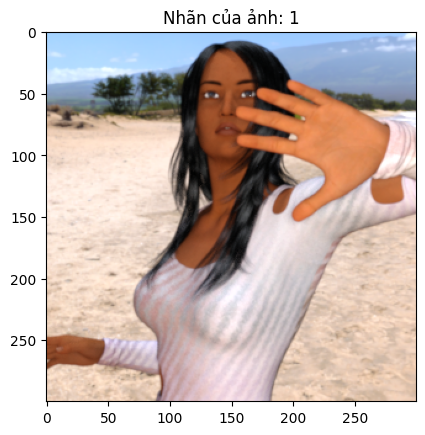

In [ ]:
# Xem ảnh đầu tiên bên trong train_batches
for batch in train_batches.take(1):
  # In số lượng ảnh trong batch ra
  print(f"Số lượng ảnh trong batch: {len(batch[0])}")
  # Các nhãn trong một batch
  print(f"Các nhãn trong batch đầu tiên: {batch[1]}")
  plt.imshow(batch[0][0])
  plt.title(f"Nhãn của ảnh: {batch[1][0]}")

Như mọi người có thể thấy ở trên, cấu trúc dữ liệu trong biến **train_batches** bao gồm một tập hợp các batch, với kích thước mỗi batch là 10 mẫu. 📦  
Bên trong mỗi **batch**, sẽ có 2 thành phần chính: **danh sách dữ liệu ảnh (batch[0])** và **danh sách nhãn (batch[1])**. 🖼️🔖

Mọi người cũng có thể làm tương tự để lấy dữ liệu cho tập hiệu chỉnh (validation) nha. Tuy nhiên, ở phần này, các bạn không cần phải shuffle (có hoặc không đều được), vì tụi mình sẽ đưa toàn bộ vào để kiểm tra. ✅

```python
# Chia tập validation
val_data = tfds.load('horses_or_humans', split='test', as_supervised=True)
validation_batches = val_data.batch(32)

# Huấn luyện mô hình
history = model.fit(train_batches, epochs=10,
 validation_data=validation_batches, validation_steps=1)
```

# Tải dữ liệu với các phiên bản khác nhau 🗂️

Theo thời gian, các bộ dữ liệu liên tục được cập nhật và thay đổi. Do đó, trong một số trường hợp, dữ liệu bạn đã sử dụng trong quá khứ có thể khác với hiện tại. ⏳

Tuy nhiên, không sao cả, bởi các phiên bản cập nhật đều được đánh số ký hiệu lại. Bạn chỉ cần chỉ định đúng phiên bản cập nhật của dữ liệu mà bạn muốn sử dụng để tải. ✅

Điển hình là bộ dữ liệu **[cnn_dailymail](https://www.tensorflow.org/datasets/catalog/cnn_dailymail)**. 📄


In [ ]:
# Tải bộ dữ liệu cnn_dailymail phiên bản mới nhất.
# data, info = tfds.load(name='cnn_dailymail:1.0.0', with_info=True)
# print(info)

!!! *Lưu ý: hiện tại phần này trên colab đang lỗi, mình đã raise bug lên trên github trên tensorflow*

Mọi người có thể uncomment và thử chạy xem có lỗi không, ở thời điểm hiện tại của mình thì đang lỗi.

# Tiếp đến, tụi mình sẽ đến với phần tăng cường ảnh (image augmentation) bằng cách ánh xạ hàm (mapping function) nha. 🖼️✨

Ở chương 3 trước đó, chúng ta đã sử dụng đoạn code dưới đây để thực hiện công việc này: 📜

```python
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Thì ở chương này, khi sử dụng **TFDS**, chúng ta sẽ định nghĩa một hàm để thực hiện công việc trên, sau đó ánh xạ hàm vào các ảnh để áp dụng tăng cường. 🔄✨

Mình sẽ sử dụng bộ dữ liệu **horse or human** cho tác vụ này nha. 🐴👨‍🏫


In [ ]:
data = tfds.load(name="horses_or_humans", split="train", as_supervised=True)

# Xáo trộn và chia vào các batch
train_batches = data.shuffle(100).batch(10)

In [ ]:
# Định nghĩa hàm biến đổi để tăng cường dữ liệu với đầu vào là ảnh và nhãn:
def augment_images(image, label):
  image = tf.cast(image, tf.float32)  # Chuyển sang dạng số thập phân
  image = (image/255) # Tiền xử lý giá trị
  image = tf.image.random_flip_left_right(image) # Lập trái phải ngẫu nhiên bức ảnh
  return image, label

In [ ]:
# Áp dụng vào data để tạo bộ ảnh được tăng cường mới:
train = data.map(augment_images)

# Tiến hành xáo trộn ngẫu nhiên và chia lại các batch (lô):
train_batches = train.shuffle(100).batch(32)

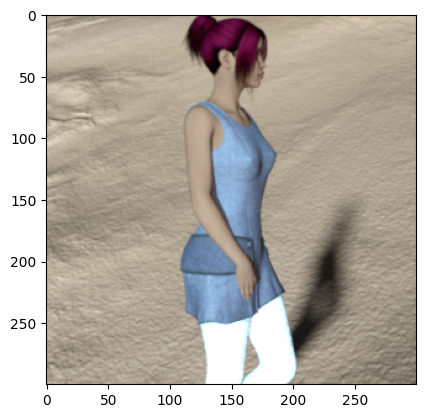

In [ ]:
# Hiển thị thử ảnh đầu tiên
for item in train_batches.take(1):
  plt.imshow(item[0][0])

# Sử dụng các tiện ích bổ sung của TensorFlow (TensorFlow Addons) 🛠️✨

Phần này giới thiệu một số hàm tiện ích hữu ích để các bạn tham khảo và sử dụng.

*Lưu ý: Tuy nhiên, hiện tại phần này đã dừng hoạt động và không còn được hỗ trợ nữa, nên mọi người chỉ đọc tham khảo thôi nha.* ⚠️

Thông tin [chi tiết](https://www.tensorflow.org/addons) về phần mở rộng này. 📖


In [ ]:
# !pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
# import tensorflow_addons as tfa

In [ ]:
# def augmentimages(image, label):
#   image = tf.cast(image, tf.float32)
#   image = (image/255)
#   image = tf.image.random_flip_left_right(image)
#   image = tfa.image.rotate(image, 40, interpolation='NEAREST')
#   return image, label

# Mọi người có thể chia dữ liệu train-test theo tùy chỉnh của mình nha. 🛠️

Hiện tại, đây là cách thông thường tụi mình làm khi load dữ liệu:

```python
data = tfds.load('cats_vs_dogs', split='train', as_supervised=True)
```

Thì bây giờ cú pháp tùy chỉnh sẽ là:
> train[\<start>:\<end>:\<step>]

Nó giống như cách chia mảng thông thường, chỉ khác là có thêm tham số step phía sau thôi à. ✂️

Tụi mình sẽ đi vào ví dụ cụ thể dưới đây nha. 👇

In [ ]:
# Lấy 10000 mẫu đầu tiên, tụi mình có thể bỏ qua tham số start phía trước nha
data = tfds.load('cats_vs_dogs', split="train[:10000]", as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.36CEET_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
# Mọi người cũng có thể sử dụng số % thay cho số cụ thể nha, ví dụ như dưới đây
# Sử dụng 20% dữ liệu đầu tiên cho việc huấn luyện
data = tfds.load('cats_vs_dogs', split="train[:20%]", as_supervised=True)

In [ ]:
# Mọi người cũng có thể thử kết hợp các phần dữ liệu lại với nhau với cú pháp sau
# Sử dụng 1000 dữ liệu đầu tiên và 10000 dữ liệu cuối cùng cho tập huấn luyện
data = tfds.load('cats_vs_dogs', split="train[:1000]+train[10000:]", as_supervised=True)

Theo như mình đọc trong sách, bộ dữ liệu **cats_vs_dogs** không có sự phân chia cụ thể hay cố định về tập huấn luyện, kiểm tra hoặc hiệu chỉnh. 📚

Do đó, mọi người có thể linh hoạt chia các bộ dữ liệu theo tỷ lệ phù hợp với yêu cầu của mình nha. 🔄

Ở đây, tụi mình sẽ thử chia **train**, **val**, và **test** theo tỷ lệ 8:2:2. 📊


In [ ]:
train_data = tfds.load('cats_vs_dogs', split='train[:80%]', as_supervised=True)
validation_data = tfds.load('cats_vs_dogs', split='train[80%:90%]', as_supervised=True)
test_data = tfds.load('cats_vs_dogs', split='train[-10%:]', as_supervised=True)

In [ ]:
print(f"Số bản ghi trong tập train {len(train_data)}")
print(f"Số bản ghi trong tập val {len(validation_data)}")
print(f"Số bản ghi trong tập test {len(test_data)}")

Số bản ghi trong tập train 18610
Số bản ghi trong tập val 2326
Số bản ghi trong tập test 2326


# Hiểu về TFRecord 📦

Dữ liệu bình thường mà mọi người lưu về sẽ được lưu vào một bộ nhớ đệm (cache). 🗂️  
Do đó, mọi người không cần phải tải lại mỗi lần sử dụng. Nếu bạn đã tải dữ liệu trước đó, khi gọi lại hàm để tải bộ dữ liệu, hệ thống sẽ tự động truy xuất từ bộ đệm trước. ⚡


In [7]:
 data, info = tfds.load("mnist", with_info=True)
 print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.OUA6QQ_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.OUA6QQ_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Bu

Như mọi người có thể thấy, đây là kết quả sau khi tải xong, dữ liệu sẽ được lưu vào thư mục này: 📁

> Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.

Đến với biến `info`, mọi người có thể thấy: 🔍


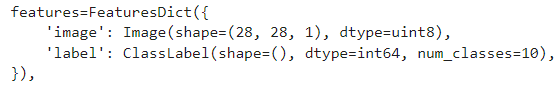

Mọi người có thể tải các bản ghi thô với **TFRecordDataset** nha.

In [8]:
# Kiểm tra thư mục bên trong /root/tensorflow_datasets/mnist/3.0.1
dir_p = "/root/tensorflow_datasets/mnist/3.0.1"
import os
print(os.listdir(dir_p))

['dataset_info.json', 'mnist-test.tfrecord-00000-of-00001', 'features.json', 'mnist-train.tfrecord-00000-of-00001']


Mọi người có thể nhấp vào biểu tượng ba chấm trong phần thư mục, tìm đến mục **root** để xem thử bên trong nha. 📂

Dưới đây là hình ảnh thư mục của mình: 🖼️


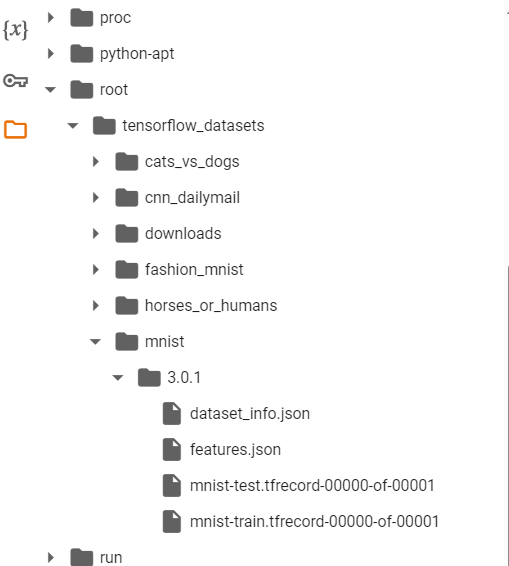

In [9]:
# Kiểm tra dữ liệu bên trong
filename = "/root/tensorflow_datasets/mnist/3.0.1/mnist-test.tfrecord-00000-of-00001"
raw_dataset = tf.data.TFRecordDataset(filename)
print(raw_dataset)
for raw_record in raw_dataset.take(1):
  print(repr(raw_record))

<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
<tf.Tensor: shape=(), dtype=string, numpy=b"\n\x85\x03\n\x0e\n\x05label\x12\x05\x1a\x03\n\x01\x02\n\xf2\x02\n\x05image\x12\xe8\x02\n\xe5\x02\n\xe2\x02\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x00\x00\x00\x00Wf\x80H\x00\x00\x01)IDAT(\x91\xc5\xd2\xbdK\xc3P\x14\x05\xf0S(v\x13)\x04,.\x82\xc5Aq\xac\xedb\x1d\xdc\n.\x12\x87n\x0e\x82\x93\x7f@Q\xb2\x08\xba\tbQ0.\xe2\xe2\xd4\xb1\xa2h\x9c\x82\xba\x8a(\nq\xf0\x83Fh\x95\n6\x88\xe7R\x87\x88\xf9\xa8Y\xf5\x0e\x8f\xc7\xfd\xdd\x0b\x87\xc7\x03\xfe\xbeb\x9d\xadT\x927Q\xe3\xe9\x07:\xab\xbf\xf4\xf3\xcf\xf6\x8a\xd9\x14\xd29\xea\xb0\x1eKH\xde\xab\xea%\xaba\x1b=\xa4P/\xf5\x02\xd7\\\x07\x00\xc4=,L\xc0,>\x01@2\xf6\x12\xde\x9c\xde[t/\xb3\x0e\x87\xa2\xe2\xc2\xe0A<\xca\xb26\xd5(\x1b\xa9\xd3\xe8\x0e\xf5\x86\x17\xceE\xdarV\xae\xb7_\xf3AR\r!I\xf7(\x06m\xaaE\xbb\xb6\xac\r*\x9b$e<\xb8\xd7\xa2\x0e\x00\xd0l\x92\xb2\xd5\x15\xcc\xae'\x00\xf4m\x08O'+\xc2y\x9f\x8d\x

Mọi người có thể thấy dữ liệu được lưu dưới định dạng **TFRecordDataset**, đây chính là định dạng ưa thích của TensorFlow. 🛠️

Dữ liệu bên trong bao gồm các mảng byte và các bản ghi được kết nối trong một tệp. Trong trường hợp bộ dữ liệu quá lớn, chúng sẽ được chia nhỏ ra. 📄📦


Định dạng này có thể hơi khó để đọc trực tiếp, nên tụi mình sẽ tạo một **feature_description** để chuyển đổi và phân tích lại dựa trên **feature** có sẵn trong phần **info**. 🛠️🔍


In [10]:
# Tạo phần mô tả cho đặc trưng
feature_description = {
  'image': tf.io.FixedLenFeature([], dtype=tf.string),
  'label': tf.io.FixedLenFeature([], dtype=tf.int64),
  }

def _parse_function(example_proto):
# Chuyển phần cú pháp đầu vào 'tf.Example' bằng dictionary mà chúng ta định nghĩa ở trên
  return tf.io.parse_single_example(example_proto, feature_description)

# Ánh xạ hàm vào các bản ghi thô
parsed_dataset = raw_dataset.map(_parse_function)
for parsed_record in parsed_dataset.take(1):
  print((parsed_record))
  print("Image: ",(parsed_record['image']))
  print("Label: ",(parsed_record['label']))

{'image': <tf.Tensor: shape=(), dtype=string, numpy=b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x00\x00\x00\x00Wf\x80H\x00\x00\x01)IDAT(\x91\xc5\xd2\xbdK\xc3P\x14\x05\xf0S(v\x13)\x04,.\x82\xc5Aq\xac\xedb\x1d\xdc\n.\x12\x87n\x0e\x82\x93\x7f@Q\xb2\x08\xba\tbQ0.\xe2\xe2\xd4\xb1\xa2h\x9c\x82\xba\x8a(\nq\xf0\x83Fh\x95\n6\x88\xe7R\x87\x88\xf9\xa8Y\xf5\x0e\x8f\xc7\xfd\xdd\x0b\x87\xc7\x03\xfe\xbeb\x9d\xadT\x927Q\xe3\xe9\x07:\xab\xbf\xf4\xf3\xcf\xf6\x8a\xd9\x14\xd29\xea\xb0\x1eKH\xde\xab\xea%\xaba\x1b=\xa4P/\xf5\x02\xd7\\\x07\x00\xc4=,L\xc0,>\x01@2\xf6\x12\xde\x9c\xde[t/\xb3\x0e\x87\xa2\xe2\xc2\xe0A<\xca\xb26\xd5(\x1b\xa9\xd3\xe8\x0e\xf5\x86\x17\xceE\xdarV\xae\xb7_\xf3AR\r!I\xf7(\x06m\xaaE\xbb\xb6\xac\r*\x9b$e<\xb8\xd7\xa2\x0e\x00\xd0l\x92\xb2\xd5\x15\xcc\xae'\x00\xf4m\x08O'+\xc2y\x9f\x8d\xc9\x15\x80\xfe\x99[q\x962@CN|i\xf7\xa9!=\xd7 \xab\x19\x00\xc8\xd6\xb8\xeb\xa1\xf0\xd8l\xca\xfb]\xee\xfb]*\x9fV\xe1\x07\xb7\xc9\x8b55\xe7M\xef\xb0\x04\xc0\xfd&\x89\x01<\xbe\xf9\x0

Chúng ta đã có thể dễ dàng tương tác hơn nhiều và thấy được rằng nhãn của bản ghi hay mẫu này là 2.

# Quy trình ETL quản lý dữ liệu trong TensorFlow 🛠️

Theo như mình đọc trong sách, **ETL** là phần cốt lõi mà TensorFlow sử dụng cho quá trình huấn luyện mô hình, bất kể quy mô hay kích thước dữ liệu như thế nào. 📚

> **Vậy ETL là gì?** 🤔


![ETL image](https://ramicetty.github.io/blog/data-pipelines-with-tensorflow-data-services/etl-revisited.png)

**ETL** là viết tắt của cụm từ **Extract - Transform - Load**. 📊

Đây là một chuỗi các bước trong quá trình quản lý dữ liệu để đưa vào huấn luyện mô hình. Trong đó:  

- **Extract**: Trích xuất dữ liệu thô từ kho dữ liệu, chuẩn bị làm tiền đề cho bước chuyển đổi. 📥  
- **Transform**: Chuyển đổi, biến đổi dữ liệu đã trích xuất sao cho phù hợp hoặc cải thiện chất lượng trước khi đưa vào huấn luyện mô hình. Các bước phổ biến trong giai đoạn này có thể là: xóa bỏ giá trị trùng lặp, điền dữ liệu thiếu, chuẩn hóa dữ liệu,... 🔄  
- **Load**: Nạp dữ liệu đã biến đổi vào mô hình để phục vụ cho việc huấn luyện. 📤  


Tụi mình cùng xem lại đoạn code trong quá trình huấn luyện mô hình phân biệt người và ngựa với bộ dữ liệu **Horse or Human** nha.


```python
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

# Bắt đầu định nghĩa mô hình #
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu',
input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(optimizer='Adam', loss='binary_crossentropy',
metrics=['accuracy'])
# Kết thúc phần định nghĩa mô hình #

# Bắt đầu quá trình trích xuất dữ liệu #
  data = tfds.load('horses_or_humans', split='train', as_supervised=True)
  val_data = tfds.load('horses_or_humans', split='test', as_supervised=True)
# Kết thúc quá trình trích xuất dữ liệu #

# Bắt đầu quá trình chuyển đổi #
def augmentimages(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/255)
  image = tf.image.random_flip_left_right(image)
  image = tfa.image.rotate(image, 40, interpolation='NEAREST')
  return image, label

 train = data.map(augmentimages)
 train_batches = train.shuffle(100).batch(32)
 validation_batches = val_data.batch(32)
# Kết thúc quá trình chuyển đổi #

# Bắt đầu quá trình nạp dữ liệu vào mô hình huấn luyện #
history = model.fit(train_batches, epochs=10,
validation_data=validation_batches, validation_steps=1)
# Kết thúc quá trình nạp dữ liệu #
```

Mình có note lại các comment phân đoạn các phần rồi ý. Có gì mọi người đọc kỹ phần code trên giúp mình nha.


# Tối ưu hóa quá trình nạp dữ liệu vào huấn luyện mô hình 🚀

Tụi mình sẽ cùng tìm hiểu sâu hơn về quá trình **ETL** nha. 🔍

Hiện tại, theo workflow mà chúng ta đang sử dụng khi huấn luyện mô hình, quy trình bao gồm **Extract - Transform - Load**. Trong đó, quá trình trích xuất và chuyển đổi dữ liệu có thể được thực hiện trên bất kỳ bộ xử lý nào **(CPU/GPU/TPU)**. 🖥️💻  

Tuy nhiên, mục đích chính của **GPU** hay **TPU** không phải là dành cho các bước này. Thay vào đó, chúng ta có thể sử dụng **CPU** để thực hiện quá trình trích xuất và chuyển đổi. Sau đó, dành **GPU/TPU** cho quá trình huấn luyện, từ đó tối ưu hiệu suất và thu được nhiều lợi ích hơn. ⚡  

Như vậy, một **workflow** lý tưởng sẽ là:  
- **CPU**: Xử lý trích xuất và chuyển đổi dữ liệu. 🔄  
- **GPU/TPU**: Xử lý quá trình huấn luyện mô hình. 🎯  


Giả định bạn đang làm việc với một bộ dữ liệu khổng lồ, đến mức cần phải chuẩn bị dữ liệu (trích xuất và chuyển đổi) thành từng đợt như hình minh họa bên dưới. 🗂️📊

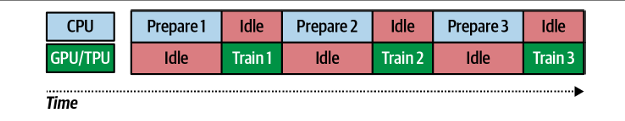

### Mô tả sơ đồ: 🖼️

- **Khối xanh lam**: Đại diện cho lúc **CPU** đang hoạt động. 🖥️  
- **Khối xanh lá**: Đại diện cho **GPU** đang hoạt động. 💻  
- **Khối màu đỏ (Idle)**: Biểu thị các khoảng trống, nghỉ hoặc lãng phí của các bộ xử lý; lúc này, bộ xử lý không hoạt động. 🛑  

Như trên sơ đồ, bạn có thể thấy:  
- Khi ở **Batch 1**, **CPU** tiến hành trích xuất và xử lý dữ liệu. Lúc này, **GPU/TPU** đang ở trạng thái **nghỉ (Idle)**. 💤  
- Sau khi **CPU** xử lý xong, nó chuyển sang trạng thái **nghỉ (Idle)**, và lúc đó **GPU/TPU** mới bắt đầu tải dữ liệu và huấn luyện mô hình.  
- Quá trình này lặp lại liên tục cho đến khi hoàn thành tất cả các **Batch**. 🔄  

Tuy nhiên, như bạn thấy, giữa các quá trình luân phiên xử lý của các bộ xử lý, luôn có các khoảng nghỉ. Điều này khiến việc xử lý toàn bộ quá trình trở nên **tốn quá nhiều thời gian và tài nguyên.** ⏳⚡  

> Do đó, chúng ta cần một phương pháp tối ưu hơn để thực hiện quá trình này. 🚀


### Giải pháp: Xử lý song song với **pipelining** 🚀

Giải pháp được đề xuất để xử lý vấn đề trên là thực hiện quá trình song song, tức là **đặt các bước chuẩn bị và huấn luyện cạnh nhau**, loại bỏ các khoảng nghỉ lãng phí. ⚙️  

Quá trình này được gọi là **pipelining** (xử lý theo đường ống), nghĩa là đưa tất cả vào trong một luồng xử lý liền mạch. Thay vì phải chạy từng phần riêng lẻ, tất cả dữ liệu sẽ chỉ cần đi qua toàn bộ quy trình một lần và trả về kết quả cuối cùng. 🛠️  

Dưới đây là hình ảnh mô tả quá trình xử lý song song: 🖼️


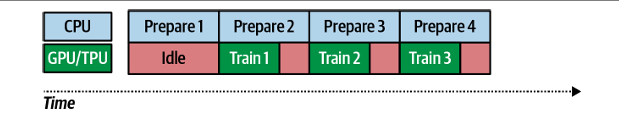

Ở **Batch đầu tiên**, quá trình vẫn diễn ra như bình thường: **CPU** hoạt động trong khi **GPU/TPU** ở trạng thái nghỉ. 🛠️💤  

Tuy nhiên, khi đến **Batch thứ hai**, cơ chế **song song** được thực hiện. Lúc này, **CPU** tiến hành chuẩn bị dữ liệu cho **batch thứ hai**, trong khi **GPU/TPU** đồng thời huấn luyện dữ liệu từ **batch thứ nhất**. 🔄⚡  

Tất nhiên, thời gian xử lý của **CPU** và **GPU/TPU** sẽ không đồng nhất. Trong trường hợp một bên chạy nhanh hơn, sẽ xuất hiện một khoảng nghỉ, nơi bộ xử lý nhanh hơn phải chờ bên còn lại hoàn thành. ⏳🤝  


Bạn có thể thấy rằng, với tập dữ liệu **Fashion MNIST**, khi chúng ta chuyển từ sử dụng **Keras** sang **TFDS**, cần phải xử lý dữ liệu theo lô trước khi huấn luyện. 🛠️  

Do đó, kỹ thuật **pipelining** (xử lý đường ống) có thể được áp dụng bất kể kích thước dữ liệu lớn hay nhỏ. Với kỹ thuật này, bạn sẽ tiếp tục sử dụng một phần mẫu dữ liệu nhất quán để thực hiện các bước **ETL** trên dữ liệu. 🔄📊  


# Tiến hành song song hóa ETL để cải thiện hiệu suất 🚀

Tụi mình sẽ đi vào code ví dụ luôn nha. 💻


In [6]:
# Tải bộ dữ liệu về
train_data, info = tfds.load('cats_vs_dogs', split = "train", with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.GBQVJY_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [7]:
print(info)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

In [8]:
# In ra tên các thư mục, file bên trong
import os
dir_path = "/root/tensorflow_datasets/cats_vs_dogs/4.0.1/"
for path in os.listdir(dir_path):
  print(path)

dataset_info.json
label.labels.txt
cats_vs_dogs-train.tfrecord-00009-of-00016
cats_vs_dogs-train.tfrecord-00005-of-00016
cats_vs_dogs-train.tfrecord-00006-of-00016
cats_vs_dogs-train.tfrecord-00015-of-00016
cats_vs_dogs-train.tfrecord-00013-of-00016
cats_vs_dogs-train.tfrecord-00004-of-00016
cats_vs_dogs-train.tfrecord-00007-of-00016
cats_vs_dogs-train.tfrecord-00000-of-00016
features.json
cats_vs_dogs-train.tfrecord-00011-of-00016
cats_vs_dogs-train.tfrecord-00012-of-00016
cats_vs_dogs-train.tfrecord-00001-of-00016
cats_vs_dogs-train.tfrecord-00002-of-00016
cats_vs_dogs-train.tfrecord-00003-of-00016
cats_vs_dogs-train.tfrecord-00010-of-00016
cats_vs_dogs-train.tfrecord-00008-of-00016
cats_vs_dogs-train.tfrecord-00014-of-00016


## Extract Process 📥

Quá trình **Extract** (trích xuất) là bước đầu tiên trong chuỗi **ETL**, nơi dữ liệu thô được lấy từ nguồn và chuẩn bị cho các bước tiếp theo.  
Hãy cùng đi vào ví dụ cụ thể để hiểu rõ hơn nha. 💻


In [9]:
file_pattern = f'/root/tensorflow_datasets/cats_vs_dogs/4.0.1/cats_vs_dogs-train.tfrecord*'
files = tf.data.Dataset.list_files(file_pattern)

In [10]:
print(files)

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


In [11]:
# Tiến hành tải các files vào bộ dữ liệu
train_dataset = files.interleave(
    tf.data.TFRecordDataset,
    cycle_length = 4,
    num_parallel_calls = tf.data.AUTOTUNE
)

Tụi mình sẽ phân tích một chút về các tham số của hàm này nha: 🔍

- **cycle_length**:  
  Tham số này đại diện cho số lượng phần tử đầu vào được xử lý đồng thời. Ở đây mình cài là `4`, tức là 4 bản ghi được xử lý cùng một lúc. Thông thường, nếu bạn không cài đặt, số lượng mặc định sẽ tương ứng với số lõi bên trong **CPU**. 🖥️  

- **num_parallel_calls**:  
  Tham số này chỉ số lượng tác vụ hay lệnh được thực thi song song. Ở đây, mình đang gán giá trị động, giúp tự động điều chỉnh dựa trên số lượng tài nguyên **CPU** hiện có. 🔄⚙️  


Quá trình trích xuất dữ liệu hiện tại của mình đã được cài đặt song song rồi nha. 🔄  
Bây giờ, tụi mình sẽ mở rộng sang quá trình chuyển đổi và biến đổi dữ liệu. 🛠️✨


## Transformer Process 🔄✨

Tụi mình sẽ tạo một hàm ánh xạ để xử lý các bản ghi dữ liệu thô (**TFRecord**) và chuyển đổi chúng thành nội dung có thể sử dụng được. 🛠️  


In [12]:
def read_tfrecord(serialized_example):
  # Định nghĩa phần mô tả đặc trưng để dễ dàng thao tác.
  feature_description = {
    "image": tf.io.FixedLenFeature((), tf.string, ""),  # Đặc trưng 'image' là một chuỗi (string).
    "label": tf.io.FixedLenFeature((), tf.int64, -1),  # Đặc trưng 'label' là một số nguyên (int64).
  }

  # Phân tích một ví dụ đơn lẻ từ dữ liệu đã được tuần tự hóa (serialized).
  example = tf.io.parse_single_example(
      serialized_example, feature_description
  )

  # Giải mã hình ảnh từ định dạng JPEG.
  image = tf.io.decode_jpeg(example['image'], channels=3)

  # Chuyển đổi kiểu dữ liệu của hình ảnh sang float32.
  image = tf.cast(image, tf.float32)

  # Chuẩn hóa giá trị pixel của hình ảnh về khoảng [0, 1].
  image = image / 255

  # Thay đổi kích thước hình ảnh về (300, 300).
  image = tf.image.resize(image, (300, 300))

  # Trả về hình ảnh đã xử lý và nhãn tương ứng.
  return image, example['label']


Tuy nhiên, phần hàm này vẫn chỉ thực hiện các tác vụ như một hàm bình thường thôi nha. 🛠️  
Việc song song hóa sẽ được thực hiện tại phần ánh xạ hàm vào dữ liệu. 🔄✨


Ở đây, tụi mình có hai cách nha:  

- **Cách 1:**
  Nếu các bạn không muốn tự động điều chỉnh, tụi mình có thể sử dụng thư viện `multiprocessing` để xác định số lõi của **CPU** trước. 🖥️   

  Sau đó, chỉ định số lõi này cho quá trình song song thông qua tham số **num_parallel_calls**. 🔧  


In [13]:
import multiprocessing

# Lấy số lượng lõi CPU hiện có trên hệ thống
cores = multiprocessing.cpu_count()
print("Số lõi: ", cores)

# Sử dụng số lượng lõi CPU để thực hiện các tác vụ song song
train_dataset = train_dataset.map(read_tfrecord, num_parallel_calls=cores)

# Lưu trữ tập dữ liệu đã xử lý vào bộ nhớ cache để tăng tốc độ truy cập trong các lần sử dụng sau, tuy nhiên
# train_dataset = train_dataset.cache()


Số lõi:  2


### Lưu ý: trong trường hợp bộ nhớ bạn khá ít, bộ dữ liệu của bạn có thể bị sập, ví dụ như hình dưới đây nha.

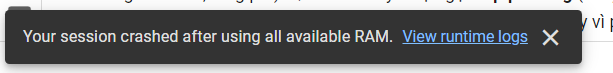

- **Cách 2:** ⚙️  
  Trong trường hợp bạn muốn tiện lợi và không cần bước xác định số lõi, bạn có thể sử dụng tham số tự động này:  

  > `tf.data.experimental.AUTOTUNE` 🔄  


In [14]:
# Xáo trộn tập dữ liệu với buffer size là 1024
train_dataset = train_dataset.shuffle(1024)

# Chia tập dữ liệu thành các batch với kích thước 32
train_dataset = train_dataset.batch(32)

# Sử dụng prefetch để tải trước các batch dữ liệu, giúp tăng tốc độ huấn luyện
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)


Bây giờ, quá trình tải dữ liệu vào và huấn luyện mô hình đã được cài đặt song song. Bây giờ tụi mình sẽ tiến hành huấn luyện mô hình.

In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Bắt đầu định nghĩa mô hình #
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu',
input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(optimizer='Adam', loss='binary_crossentropy',
metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
 model.fit(train_dataset, epochs=10, verbose=1)

Epoch 1/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 91s 98ms/step - accuracy: 0.5425 - loss: 0.6822
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


727/727 ━━━━━━━━━━━━━━━━━━━━ 114s 78ms/step - accuracy: 0.7294 - loss: 0.5430
Epoch 3/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 66s 89ms/step - accuracy: 0.8024 - loss: 0.4229
Epoch 4/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 74s 78ms/step - accuracy: 0.8511 - loss: 0.3371
Epoch 5/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 66s 88ms/step - accuracy: 0.8879 - loss: 0.2633
Epoch 6/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 59s 78ms/step - accuracy: 0.9216 - loss: 0.1967
Epoch 7/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 66s 88ms/step - accuracy: 0.9443 - loss: 0.1430
Epoch 8/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 74s 77ms/step - accuracy: 0.9630 - loss: 0.0964
Epoch 9/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 66s 89ms/step - accuracy: 0.9728 - loss: 0.0720
Epoch 10/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 74s 77ms/step - accuracy: 0.9796 - loss: 0.0554


# Tổng kết: 🎉  

Vậy là tụi mình đã kết thúc chương 4 rồi nha! 📘  
Những kiến thức mọi người đã được tiếp thu bao gồm:  

- **TensorFlow Dataset**: Cấu trúc dữ liệu được lưu bên trong TensorFlow, giúp bạn truy cập, quản lý dữ liệu một cách hiệu quả. 🗂️  
- **Quá trình ETL**: Các bước cơ bản trong quản lý dữ liệu, bao gồm **Extract** (trích xuất), **Transform** (chuyển đổi), và **Load** (nạp dữ liệu). Hiểu rõ quy trình này sẽ giúp bạn xử lý dữ liệu một cách bài bản và linh hoạt. 🔄  
- **Cách tối ưu hóa quá trình ETL**: Sử dụng phương pháp song song hóa để giảm thời gian xử lý và tăng hiệu suất. Kỹ thuật **pipelining** đã được áp dụng để thực hiện các bước **ETL** một cách liền mạch và phương pháp xử lý song song. 🚀  

Hy vọng qua chương này, mọi người không chỉ nắm được cách xử lý dữ liệu mà còn hiểu cách tối ưu hóa quy trình huấn luyện mô hình khi làm việc với TensorFlow. Nếu có bất kỳ thắc mắc nào, đừng ngần ngại đặt câu hỏi nha. 😊
